# Laboratorio 1 - Clasificación

### Importaciones

In [63]:
#Librerías necesarias
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
# Ranom seed
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


### Carga de datos

In [8]:
#Ubicacion de la base de datos
db_location = "data/202120_Laboratorio_1_datos_SaludAlpes_diagnosticos_dataset.csv"

In [12]:
# Leer los datos
df = pd.read_csv(db_location, sep=";")
df

,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6,148,New York,72,35,0,336,627,50,1
1,Black,1,85,New York,66,29,0,266,351,31,0
2,Red,8,183,New York,64,0,0,233,672,32,1
3,Black,1,89,New York,66,23,94,281,167,21,0
4,Black,0,137,New York,40,35,168,431,2288,33,1
...,...,...,...,...,...,...,...,...,...,...,...
763,Black,10,101,New York,76,48,180,329,171,63,0
764,Black,2,122,New York,70,27,0,368,34,27,0
765,Red,5,121,New York,72,23,112,262,245,30,0
766,Black,1,126,New York,60,0,0,301,349,47,1


In [10]:
# Dimensiones de los datos
df.shape

(768, 11)

In [30]:
df.dtypes

Hair color                   object
Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness                object
Insulin                     float64
BMI                           int64
DiabetesPedigreeFunction     object
Age                           int64
Outcome                      object
dtype: object

### Limpieza de datos

In [14]:
df["Pregnancies"].unique()

array(['6', '1', '8', '0', '5', '3', '10', '2', '4', '7', '9', '11', '13',
       '15', '17', '12', '14', '-'], dtype=object)

Nos dimos cuenta que en las columnas, hay valores que deberían ser numéricos pero aparecen como objetos. En el caso de Pregnancies es porque hay valores que son '-' que en este caso asumiremos que son lo mismo que 0. 

In [16]:
df["Pregnancies"] = df["Pregnancies"].replace("-",0)
df["Pregnancies"] = pd.to_numeric(df["Pregnancies"])
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [17]:
df["Glucose"].unique()

array(['148', '85', '183', '89', '137', '116', '78', '115', '197', '125',
       '110', '168', '139', '189', '166', '100', '118', '107', '103',
       '126', '99', '196', '119', '143', '147', '97', '145', '117', '109',
       '158', '88', '92', '122', '138', '102', '90', '111', '180', '133',
       '106', '171', '159', '146', '71', '105', '101', '176', '150', '73',
       '187', '84', '44', '141', '114', '95', '129', '79', '0', '62',
       '131', '112', '113', '74', '83', '136', '80', '123', '81', '134',
       '142', '144', '93', '163', '151', '96', '155', '76', '160', '124',
       '162', '132', '120', '173', '170', '128', '108', '154', '57',
       '156', '153', '188', '152', '104', '87', '75', '179', '130', '194',
       '181', '135', '184', '140', '177', '164', '91', '165', '86', '193',
       '191', '161', '167', '77', '182', '157', '178', '61', '98', '127',
       '82', '72', '172', '94', '175', '195', '68', '186', '198', '121',
       '-', '67', '174', '199', '56', '169', '149

Después de darnos 

In [18]:
df["Glucose"] = pd.to_numeric(df["Glucose"], errors = "coerce")

In [19]:
df["City"].value_counts()

New York    767
-             1
Name: City, dtype: int64

Tomamos la decisión de eliminar la columna de ciudad, ya que todos los valores son New York, y por lo tanto no es una columna con valores relevantes para el diagnóstico de pacientes con diabetes. 

In [20]:
del df["City"]

In [21]:
df["BloodPressure"].unique()

array(['72', '66', '64', '40', '74', '50', '0', '70', '96', '92', '80',
       '60', '84', '30', '88', '90', '94', '76', '82', '75', '58', '78',
       '68', '110', '56', '62', '85', '86', '48', '44', '65', '108', '55',
       '122', '54', '52', '98', '104', '95', '46', '102', '100', '61',
       '-', '24', '38', '106', '114'], dtype=object)

In [22]:
df["BloodPressure"] = pd.to_numeric(df["BloodPressure"], errors = "coerce")
df["BloodPressure"] = df["BloodPressure"].replace(0,np.nan)

In [23]:
df["SkinThickness"].value_counts()

0     226
32     31
30     27
27     23
23     22
     ... 
99      1
-       1
60      1
63      1
56      1
Name: SkinThickness, Length: 52, dtype: int64

In [24]:
df["Insulin"].value_counts()

0      373
105     11
140      9
130      9
120      8
      ... 
184      1
326      1
478      1
474      1
112      1
Name: Insulin, Length: 187, dtype: int64

In [25]:
df["Insulin"] = pd.to_numeric(df["Insulin"], errors = "coerce")

In [26]:
df["Insulin"].unique()

array([  0.,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [27]:
df["BMI"].value_counts()

32     13
312    12
316    12
0      11
333    10
       ..
389     1
393     1
396     1
397     1
321     1
Name: BMI, Length: 248, dtype: int64

In [55]:
df

,Hair color,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6,148.0,72.0,35,0.0,336,627,50,1
1,Black,1,85.0,66.0,29,0.0,266,351,31,0
2,Red,8,183.0,64.0,0,0.0,233,672,32,1
3,Black,1,89.0,66.0,23,94.0,281,167,21,0
4,Black,0,137.0,40.0,35,168.0,431,2288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,Black,10,101.0,76.0,48,180.0,329,171,63,0
764,Black,2,122.0,70.0,27,0.0,368,34,27,0
765,Red,5,121.0,72.0,23,112.0,262,245,30,0
766,Black,1,126.0,60.0,0,0.0,301,349,47,1


In [60]:
df["DiabetesPedigreeFunction"] = pd.to_numeric(df["DiabetesPedigreeFunction"], errors = "coerce")

In [58]:
df["Age"] = pd.to_numeric(df["Age"], errors = "coerce")

In [64]:
le = preprocessing.LabelEncoder()
df["Hair color"]=le.fit_transform(df["Hair color"])

In [66]:
df = df.dropna()

In [69]:
df

,Hair color,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,6,148.0,72.0,35,0.0,336,627.0,50,1
1,0,1,85.0,66.0,29,0.0,266,351.0,31,0
2,2,8,183.0,64.0,0,0.0,233,672.0,32,1
3,0,1,89.0,66.0,23,94.0,281,167.0,21,0
4,0,0,137.0,40.0,35,168.0,431,2288.0,33,1
...,...,...,...,...,...,...,...,...,...,...
763,0,10,101.0,76.0,48,180.0,329,171.0,63,0
764,0,2,122.0,70.0,27,0.0,368,34.0,27,0
765,2,5,121.0,72.0,23,112.0,262,245.0,30,0
766,0,1,126.0,60.0,0,0.0,301,349.0,47,1


In [68]:
df.describe()

,Hair color,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,0.174863,3.849727,121.071038,72.400273,83.724044,292.987705,436.882514,38.355191
std,0.527775,3.356899,32.192528,12.389910,116.645688,112.854839,338.356719,120.662318
min,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,21.000000
25%,0.000000,1.000000,99.000000,64.000000,0.000000,254.000000,207.000000,24.000000
50%,0.000000,3.000000,117.000000,72.000000,45.500000,312.000000,344.000000,29.000000
75%,0.000000,6.000000,141.000000,80.000000,130.000000,359.000000,597.250000,41.000000
max,2.000000,17.000000,199.000000,122.000000,846.000000,671.000000,2329.000000,3256.000000


array([[<AxesSubplot:xlabel='Hair color', ylabel='Hair color'>,
        <AxesSubplot:xlabel='Pregnancies', ylabel='Hair color'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Hair color'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Hair color'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Hair color'>,
        <AxesSubplot:xlabel='BMI', ylabel='Hair color'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Hair color'>,
        <AxesSubplot:xlabel='Age', ylabel='Hair color'>],
       [<AxesSubplot:xlabel='Hair color', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Pregnancies', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BMI', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='

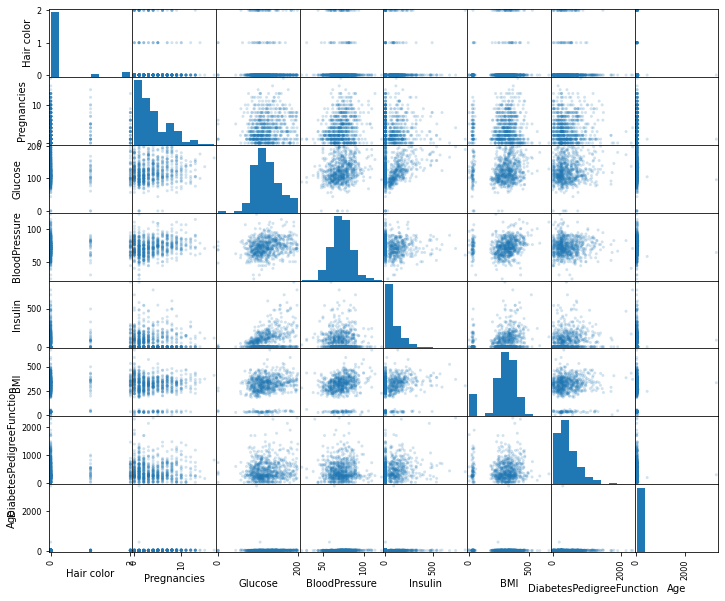

In [75]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(12,10))

### Separación de datos

In [76]:
Y = df["Outcome"]
X = df.drop(columns=["Outcome"])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=53, shuffle=True)

In [77]:
X

,Hair color,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,6,148.0,72.0,35,0.0,336,627.0,50
1,0,1,85.0,66.0,29,0.0,266,351.0,31
2,2,8,183.0,64.0,0,0.0,233,672.0,32
3,0,1,89.0,66.0,23,94.0,281,167.0,21
4,0,0,137.0,40.0,35,168.0,431,2288.0,33
...,...,...,...,...,...,...,...,...,...
763,0,10,101.0,76.0,48,180.0,329,171.0,63
764,0,2,122.0,70.0,27,0.0,368,34.0,27
765,2,5,121.0,72.0,23,112.0,262,245.0,30
766,0,1,126.0,60.0,0,0.0,301,349.0,47
